In [26]:
import json

filename = 'btc_close_2017.json'
with open(filename) as f:
    btc_data = json.load(f)
dates = []
months = []
weeks = []
weekdays = []
close = []
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append(int(float(btc_dict['close'])))

import pygal
line_chart = pygal.Line(x_label_rotation = 20,show_mirror_x_labels = False)
line_chart.title = '收盘价（¥）'
line_chart.x_labels = dates
N = 20
line_chart.x_labels_major = dates[::N]
line_chart.add('收盘价',close)
line_chart.render_to_file('收盘价折线图（¥）.svg')


    

In [27]:
import json

filename = 'btc_close_2017.json'
with open(filename) as f:
    btc_data = json.load(f)
dates = []
months = []
weeks = []
weekdays = []
close = []
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append(int(float(btc_dict['close'])))

import pygal
import math
line_chart = pygal.Line(x_label_rotation = 20,show_mirror_x_labels = False)
line_chart.title = '收盘价对数变换（¥）'
line_chart.x_labels = dates
N = 20
line_chart.x_labels_major = dates[::N]
close_log = [math.log10(_) for _ in close]
line_chart.add('log收盘价',close_log)
line_chart.render_to_file('收盘价对数变换折线图（¥）.svg')



ModuleNotFoundError: No module named 'cairosvg'

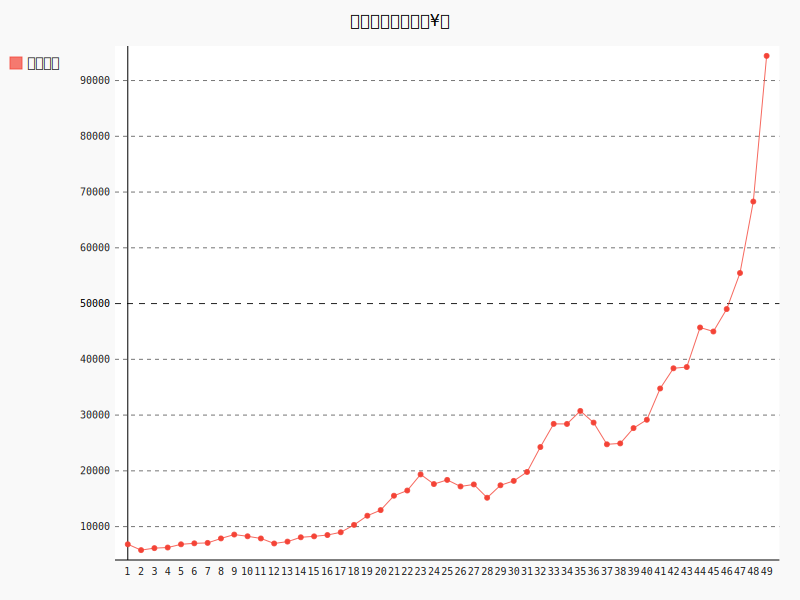

In [5]:

from itertools import groupby

def draw_line(x_data,y_data,title,y_legend):
    xy_map = []
    for x,y in groupby(sorted(zip(x_data,y_data)),key = lambda _: _[0]):
        y_list = [v for _,v in y]
        xy_map.append([x,sum(y_list)/len(y_list)])
    x_unique,y_mean = [*zip(*xy_map)]
    line_chart = pygal.Line()
    line_chart.title = title
    line_chart.x_labels = x_unique
    line_chart.add(y_legend,y_mean)
    line_chart.render_to_file(title+'.svg')
    return line_chart


idx_month = dates.index('2017-12-01')
line_chart_month = draw_line(months[:idx_month],close[:idx_month],'收盘价月均值（¥）','月日均值')
line_chart_month

idx_week = dates.index('2017-12-11')
line_chart_week = draw_line(weeks[1:idx_week],close[1:idx_week],'收盘价周日均值（¥）','周日均值')
line_chart_week

ModuleNotFoundError: No module named 'cairosvg'

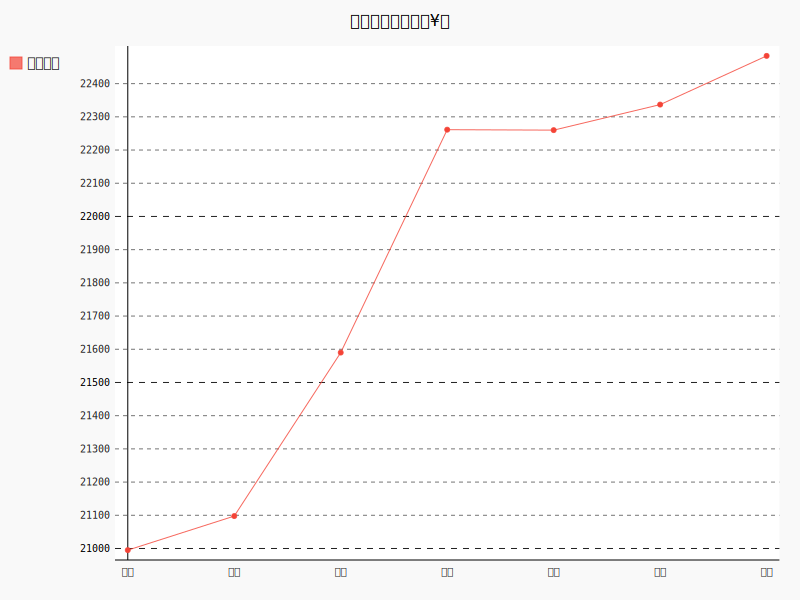

In [29]:
idx_week = dates.index('2017-12-11')
wd = ['Monday', 'Tuesday', 'Wednesday',
      'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_int = [wd.index(w) + 1 for w in weekdays[1:idx_week]]
line_chart_weekday = draw_line(
    weekdays_int, close[1:idx_week], '收盘价星期均值（¥）', '星期均值')
line_chart_weekday.x_labels = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
line_chart_weekday.render_to_file('收盘价星期均值（¥）.svg')
line_chart_weekday

In [ ]:
idx_week = dates.index('2017-12-11')
wd = ['Monday', 'Tuesday', 'Wednesday',
      'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_int = [wd.index(w) + 1 for w in weekdays[1:idx_week]]
line_chart_weekday = draw_line(
    weekdays_int, close[1:idx_week], '收盘价星期均值（¥）', '星期均值')
line_chart_weekday.x_labels = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
line_chart_weekday.render_to_file('收盘价星期均值（¥）.svg')
line_chart_weekday

In [21]:
with open ('收盘价Dashboard.html','w',encoding = 'utf8') as html_file:
    html_file.write('<html><head><title>收盘价Dashboard</title><metacharset="utf-8"></head><body>\n')
    for svg in [
        '收盘价折线图（¥）.svg','收盘价对数变换折线图（¥）.svg','收盘价月均值（¥）.svg',
        '收盘价周日均值（¥）.svg'
    ]:
        html_file.write(
            '    <object type="image/svg+xml" data ="{0}" height=500></object>\n'.format(svg))
    html_file.write('</body></html>')

ValueError: '1' is not in list

ModuleNotFoundError: No module named 'cairosvg'

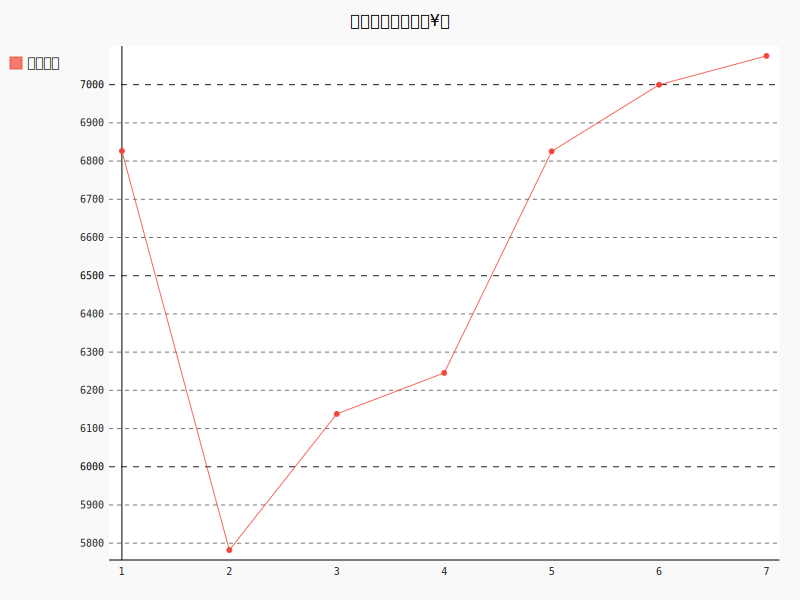